Questions:

Q-1: Does traveling with family (SibSp, Parch) increase survival odds?

Q2: What is the survival rate for passengers traveling alone?

Q-3: Are there patterns in survival based on family size?

Q-4: Can we engineer a FamilySize feature and analyze its impact?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic= sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
def family_status (x):
    if x["sibsp"]+x["parch"] >0:
        return "with family"
    else:
        return "alone"

titanic["family_status"]= titanic.apply(family_status,axis=1)   

In [32]:
titanic_survived_family= titanic.groupby("family_status",observed=True)["survived"].mean() *100
print(titanic_survived_family)

family_status
alone          30.353818
with family    50.564972
Name: survived, dtype: float64


In [30]:
for index,percentage in titanic_survived_family.items():
    print(f"{percentage:.2f}","% of survivals are travelling",index,".")

30.35 % of survivals are travelling alone .
50.56 % of survivals are travelling with family .


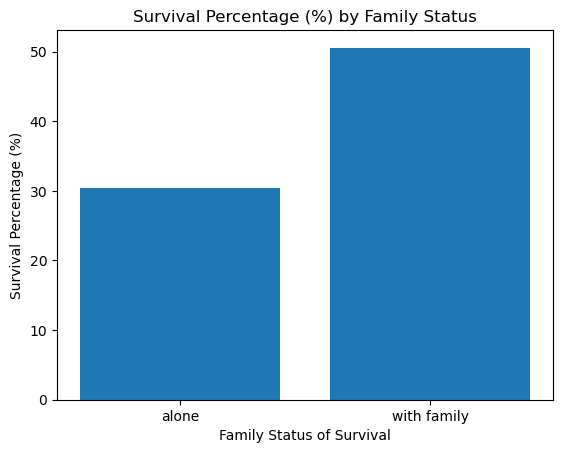

In [47]:
plt.bar(titanic_survived_family.index,titanic_survived_family.values)
plt.xlabel("Family Status of Survival")
plt.ylabel("Survival Percentage (%)")
plt.title("Survival Percentage (%) by Family Status")
plt.show()

In [51]:
titanic["family_size"]= 1+ titanic["sibsp"] + titanic["parch"]
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_status,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,with family,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,with family,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,alone,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,with family,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,alone,1


In [130]:
titanic_survived_family_size= titanic.groupby(by=["class","family_size"],observed=True)["survived"].mean() * 100
print(titanic_survived_family_size)

class   family_size
First   1               53.211009
        2               72.857143
        3               75.000000
        4               71.428571
        5              100.000000
        6               50.000000
Second  1               34.615385
        2               52.941176
        3               67.741935
        4               76.923077
        5              100.000000
        6              100.000000
Third   1               21.296296
        2               35.087719
        3               42.553191
        4               66.666667
        5                0.000000
        6                0.000000
        7               33.333333
        8                0.000000
        11               0.000000
Name: survived, dtype: float64


In [69]:
for index,values in titanic_survived_family_size.items():
    print(f"{values:.2f}","% of survivarals are belong to",index,"class and family size respectively.")

53.21 % of survivarals are belong to ('First', 1) class and family size respectively.
72.86 % of survivarals are belong to ('First', 2) class and family size respectively.
75.00 % of survivarals are belong to ('First', 3) class and family size respectively.
71.43 % of survivarals are belong to ('First', 4) class and family size respectively.
100.00 % of survivarals are belong to ('First', 5) class and family size respectively.
50.00 % of survivarals are belong to ('First', 6) class and family size respectively.
34.62 % of survivarals are belong to ('Second', 1) class and family size respectively.
52.94 % of survivarals are belong to ('Second', 2) class and family size respectively.
67.74 % of survivarals are belong to ('Second', 3) class and family size respectively.
76.92 % of survivarals are belong to ('Second', 4) class and family size respectively.
100.00 % of survivarals are belong to ('Second', 5) class and family size respectively.
100.00 % of survivarals are belong to ('Second'

In [81]:
target_value=titanic_survived_family_size.max()
target_value=[target_value]

In [82]:
mask= titanic_survived_family_size.isin(target_value)
result= titanic_survived_family_size[mask].index

In [86]:
print("We have",titanic_survived_family_size.max(),"% survival changes if you have travelled in",result,"class with family size respectively")

We have 100.0 % survival changes if you have travelled in MultiIndex([( 'First', 5),
            ('Second', 5),
            ('Second', 6)],
           names=['class', 'family_size']) class with family size respectively


In [131]:
titanic_survived_family_size

class   family_size
First   1               53.211009
        2               72.857143
        3               75.000000
        4               71.428571
        5              100.000000
        6               50.000000
Second  1               34.615385
        2               52.941176
        3               67.741935
        4               76.923077
        5              100.000000
        6              100.000000
Third   1               21.296296
        2               35.087719
        3               42.553191
        4               66.666667
        5                0.000000
        6                0.000000
        7               33.333333
        8                0.000000
        11               0.000000
Name: survived, dtype: float64

In [132]:
titanic_survived_family_size=titanic_survived_family_size.reset_index(drop=False)

In [135]:
titanic_survived_family_size.set_index(keys="class")

,family_size,survived
class,,
First,1,53.211009
First,2,72.857143
First,3,75.000000
First,4,71.428571
First,5,100.000000
First,6,50.000000
Second,1,34.615385
Second,2,52.941176
Second,3,67.741935


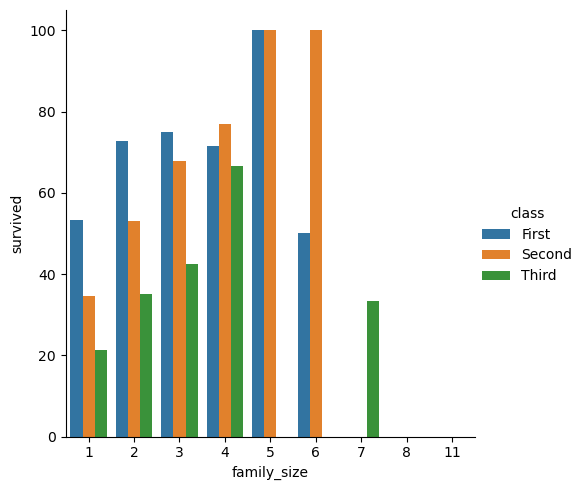

In [149]:
sns.catplot(data=titanic_survived_family_size,kind="bar",x="family_size",y="survived", hue="class")

In [178]:
titanic_survived_family= titanic.pivot_table(values="survived",index="class",columns="family_size",observed=True) * 100
titanic_survived_family= titanic_survived_family.fillna(0)

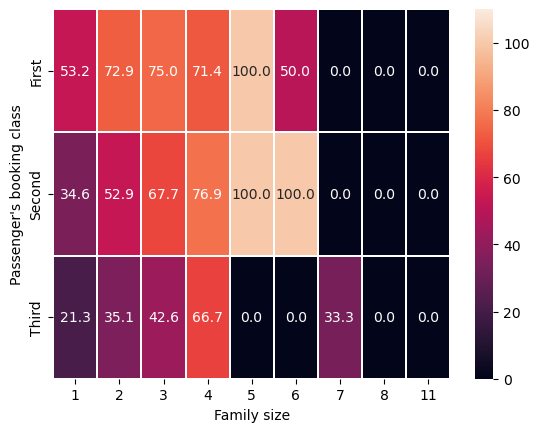

In [179]:
sns.heatmap(data=titanic_survived_family,annot=True,linewidths=0.1,vmax= 110,fmt=".1f")
plt.xlabel("Family size")
plt.ylabel("Passenger's booking class")
plt.show()